In [121]:
library(ggplot2)

In [122]:
LM = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/in_vivo_comparison/sce_lamanno_ips.Rds")

In [123]:
LM

class: SingleCellExperiment 
dim: 14726 337 
metadata(0):
assays(1): counts
rownames(14726): WASH7P_p1 LINC01002_loc4 ... SPRY3_loc2 VAMP7_loc1
rowData names(0):
colnames(337): 1772099-259_E02 1772116-063_D07 ... 1772116-063_G02
  1772099-259_H03
colData names(3): Cell_ID Cell_type Timepoint
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [124]:
LM <- scater::logNormCounts(LM, log=T)
LM

class: SingleCellExperiment 
dim: 14726 337 
metadata(0):
assays(2): counts logcounts
rownames(14726): WASH7P_p1 LINC01002_loc4 ... SPRY3_loc2 VAMP7_loc1
rowData names(0):
colnames(337): 1772099-259_E02 1772116-063_D07 ... 1772116-063_G02
  1772099-259_H03
colData names(3): Cell_ID Cell_type Timepoint
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [125]:
lamanno_dir = "/nfs/leia/research/stegle/dseaton/data/scrnaseq_datasets/lemanno2016_mouse_human_DAneuron/"
filename1 = paste0(lamanno_dir, 'lemanno2016_human_embryo_brain_markers.tsv')
df1 = read.csv(filename1, sep = "\t")
df1$celltype_id = as.character(df1$celltype_id)
DA_genes = as.character(df1[df1$celltype_id %in% c('hDA0','hDA1','hDA2'),'marker_gene'])
head(DA_genes)

[1] "ACOT7"  "ACSL4"  "ACSL5"  "ACTL6B" "ACVR1B" "ADARB2"

In [126]:
pca = prcomp(t(logcounts(LM)))
# pca = prcomp(t(logcounts(LM)[rownames(LM) %in% DA_genes,]))

In [127]:
df = as.data.frame(cbind(pca$x[,1:2], colData(LM)[,c("Cell_type","Timepoint")]))
head(df,2)

,PC1,PC2,Cell_type,Timepoint
1772099-259_E02,-3.930483,8.804839,iMN2,day_63
1772116-063_D07,5.731078,-1.436427,iMN2,day_42


In [128]:
nrow(df)
nrow(df[df$Cell_type == "iDAa",])
nrow(df[df$Cell_type == "iDAb",])
nrow(df[df$Cell_type == "iDAc",])

[1] 337

[1] 21

[1] 23

[1] 26

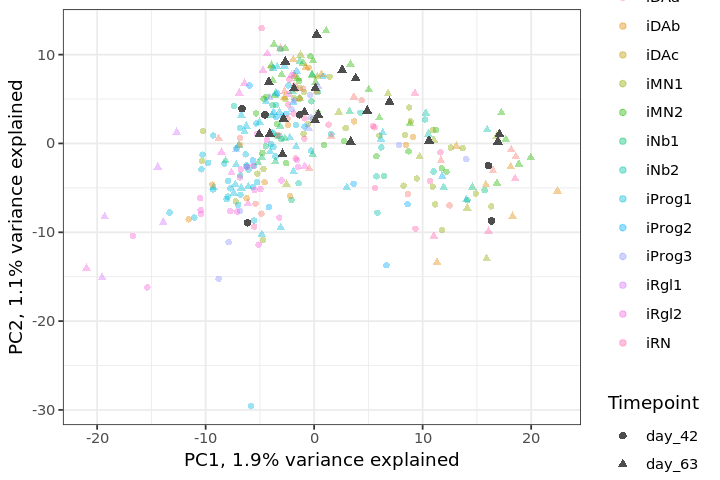

In [129]:
perc_var <- round(summary(pca)$importance[2,]*100, 1)
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(df, aes(x = PC1, y = PC2, colour = Cell_type, shape = Timepoint)) + 
        geom_point(alpha = 0.4, size = 1.5) + 
#         scale_color_canva(palette = "Pool party") +
        geom_point(aes(x = PC1, y = PC2), data = df[grep("iDAc",df$Cell_type),], col = "grey30",alpha = 1,size = 1.8) +
        theme_bw() + #theme(legend.position = "none", panel.border = element_blank()) + 
        xlab(paste0("PC1, ",perc_var[1],"% variance explained")) +
        ylab(paste0("PC2, ",perc_var[2],"% variance explained"))

In [130]:
pca_df = df

In [131]:
set.seed(147)
library(Rtsne)
tsne <- Rtsne(t(logcounts(LM)), pca = TRUE)

In [132]:
tsne_df = as.data.frame(cbind(tsne$Y, colData(LM)[,c("Cell_type","Timepoint","Cell_ID")]))
colnames(tsne_df)[1:2] = paste0("tsne",1:2)
rownames(tsne_df) = tsne_df$Cell_ID
head(tsne_df,2)

,tsne1,tsne2,Cell_type,Timepoint,Cell_ID
1772099-259_E02,4.674097,-1.338727,iMN2,day_63,1772099-259_E02
1772116-063_D07,-2.716225,3.520064,iMN2,day_42,1772116-063_D07


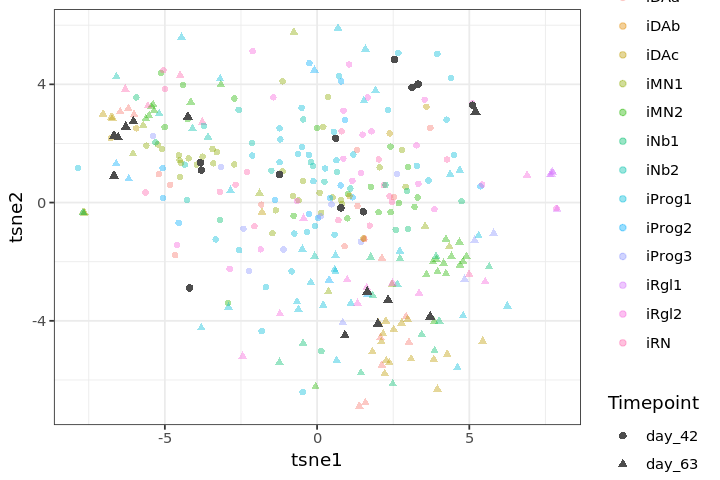

In [133]:
ggplot(tsne_df, aes(x = tsne1, y = tsne2, colour = Cell_type, shape = Timepoint)) + 
        geom_point(alpha = 0.4, size = 1.5) + 
#         scale_color_canva(palette = "Pool party") +
        geom_point(aes(x = tsne1, y = tsne2), data = tsne_df[grep("iDAb",tsne_df$Cell_type),], col = "gray30", alpha = 1, size = 1.8) +
        theme_bw() 
# + #theme(legend.position = "none", panel.border = element_blank()) + 

In [134]:
library(umap)
embedding = umap(t(logcounts(LM)))

In [135]:
umap_df = as.data.frame(cbind(embedding$layout, colData(LM)[,c("Cell_type","Timepoint","Cell_ID")]))
colnames(umap_df)[1:2] = paste0("umap",1:2)
rownames(umap_df) = umap_df$Cell_ID
head(umap_df,2)

,umap1,umap2,Cell_type,Timepoint,Cell_ID
1772099-259_E02,0.5941596,-0.75939338,iMN2,day_63,1772099-259_E02
1772116-063_D07,-0.9808942,-0.06790109,iMN2,day_42,1772116-063_D07


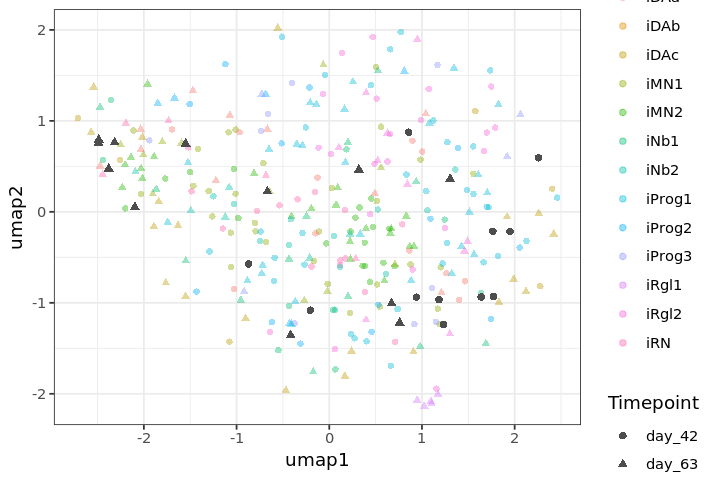

In [136]:
ggplot(umap_df, aes(x = umap1, y = umap2, colour = Cell_type, shape = Timepoint)) + 
        geom_point(alpha = 0.4, size = 1.5) + 
#         scale_color_canva(palette = "Pool party") +
        geom_point(aes(x = umap1, y = umap2), data = umap_df[grep("iDAb",umap_df$Cell_type),], col = "gray30", alpha = 1, size = 1.8) +
        theme_bw() 
# + #theme(legend.position = "none", panel.border = element_blank()) + 

In [137]:
LM$Cell_type = as.character(LM$Cell_type)
unique(LM$Cell_type)

[1] "iMN2"   "iRN"    "iNb2"   "iMN1"   "iProg2" "iProg3" "iRgl1"  "iProg1"
 [9] "iRgl2"  "iDAa"   "iNb1"   "iDAb"   "iDAc"

In [138]:
# LM = LM[,LM$Cell_type %in% c('iDAa','iDAb','iDAc')]
LM = LM[,LM$Cell_type %in% c('iDAa','iDAb','iDAc','iProg1','iProg2','iProg3')]

In [139]:
LM

class: SingleCellExperiment 
dim: 14726 160 
metadata(0):
assays(2): counts logcounts
rownames(14726): WASH7P_p1 LINC01002_loc4 ... SPRY3_loc2 VAMP7_loc1
rowData names(0):
colnames(160): 1772116-062_F09 1772116-064_D02 ... 1772116-063_G02
  1772099-259_H03
colData names(3): Cell_ID Cell_type Timepoint
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [140]:
LM <- scater::logNormCounts(LM, log=T)
alt.fit2 <- scran::trendVar(LM, use.spikes = FALSE)
alt.decomp2 <- scran::decomposeVar(LM, alt.fit2)

Warning message:
“'trendVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'decomposeVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'testVar' is deprecated.
See help("Deprecated")”

In [141]:
genes_LM = rownames(alt.decomp2[order(alt.decomp2$bio, decreasing = TRUE),][1:2000,])

In [142]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/in_vivo_comparison/"

In [143]:
neuroseq_filename = paste0(mydir,"neuroseq_all_25pct_sce.Rds")
neuroseq = readRDS(neuroseq_filename)

In [144]:
neuroseq = neuroseq[,neuroseq$celltype %in% c('DA','Sert','CHem')]

In [145]:
neuroseq <- scater::logNormCounts(neuroseq, log=T)
design <- model.matrix(~pool_id, data = colData(neuroseq))
alt.fit <- scran::trendVar(neuroseq, design = design, use.spikes = FALSE)
alt.decomp <- scran::decomposeVar(neuroseq, alt.fit)

Warning message:
“'trendVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'decomposeVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'testVar' is deprecated.
See help("Deprecated")”

In [146]:
genes_neuroseq = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),][1:2000,])

In [147]:
all_genes = unique(c(genes_LM,genes_neuroseq))

In [148]:
genes_n = rownames(neuroseq)[rownames(neuroseq) %in% all_genes]
common_genes = rownames(LM)[rownames(LM) %in% genes_n]

In [149]:
length(common_genes)

[1] 3101

In [150]:
query = neuroseq[common_genes,]
reference = LM[common_genes,]

In [151]:
query$batch_factor = "query"
reference$batch_factor = "reference"

In [152]:
getJointPCA = function(reference, query, 
                       assayNameRef = "logcounts",
                       assayNameQuery = "logcounts") {
# reference and query are SingleCellExperiment objects
  all_assay = cbind(assay(query, assayNameQuery),
                    assay(reference, assayNameRef))
# batch factors can be dataset specific batches or just a factor labelling i.e. "query", "reference" 
#   batchFactor = factor(c(as.character(query$sample_id),
#                            as.character(reference$dataset)))
 batchFactor = factor(c(as.character(query$batch_factor),
                           as.character(reference$batch_factor)))
#   print(table(batchFactor))
  mbpca = batchelor::multiBatchPCA(all_assay,
                        batch = batchFactor,
                        d = 50
                        # BPPARAM = BiocParallel::MulticoreParam(workers = 4)
  )
  print("done multibatch PCA")
  dim(mbpca[[1]])
  out = do.call(batchelor::reducedMNN, mbpca)
  print("done batch correction")
  joint_mnn_pca = out$corrected
  return(joint_mnn_pca)
}

In [153]:
joint_mnn_pca = getJointPCA(reference, query)

Warning message in sweep(centered, 2, w, "/", check.margin = FALSE):
“'check.margin' is ignored when 'x' is a DelayedArray object or
  derivative”

[1] "done multibatch PCA"
[1] "done batch correction"


In [154]:
df_pca = as.data.frame(joint_mnn_pca[,c(1:2)])
colnames(df_pca) = paste0("PC",1:2)
head(df_pca)

,PC1,PC2
TAGAGCTAGCGTAATA-1-6,-15.5545015,0.4578388
CATGACAGTGTGCCTG-1-6,-5.6314954,-9.7545476
ACAGCCGGTATATCCG-1-6,-11.9066917,-0.9896021
GGGCACTCAAAGCGGT-1-6,-16.3308898,1.6393185
GATGCTATCCTTCAAT-1-6,-0.9373993,-16.2620138
TTGGCAATCAGCATGT-1-6,-11.9476337,-4.4981515


In [155]:
mat = matrix(0, nrow = length(unique(query$celltype)), ncol = length(unique(reference$Cell_type)))
nrow(mat)
ncol(mat)

[1] 3

[1] 6

In [156]:
rownames(mat) = unique(query$celltype)
colnames(mat) = unique(reference$Cell_type)

In [157]:
i = 0
for (celltype in unique(query$celltype)){
#     print(celltype)
    j = 0
    i = i+1
    sel_cells = colnames(query[,query$celltype == celltype])
    closest_atlas_cell_ind = BiocNeighbors::queryKNN(
        joint_mnn_pca[colnames(reference),],
        joint_mnn_pca[sel_cells,],
        k = 1, get.index = TRUE, get.distance = FALSE)
    mapped_cells = colnames(reference)[closest_atlas_cell_ind$index]
    for (cluster in unique(reference$Cell_type)){
#         print(cluster)
        j = j+1
        n = length(mapped_cells[mapped_cells %in% colnames(reference[,reference$Cell_type == cluster])])
        mat[i,j] = n/length(mapped_cells)
#         print(mat[i,j])
    }
}

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

In [158]:
mat

,iProg2,iProg3,iProg1,iDAa,iDAb,iDAc
Sert,0.9435427,0.012811465,0.0007871451,0.00249715,0.0401444,0.0002171435
DA,0.1994900,0.016006174,0.0015435724,0.01463038,0.7356129,0.0327170229
CHem,0.2558757,0.004359363,0.0016110690,0.03572782,0.6992987,0.0031273692


In [159]:
library(reshape2)
mat_melt = melt(mat)
head(mat_melt)

Var1,Var2,value
Sert,iProg2,0.943542696
DA,iProg2,0.199489950
CHem,iProg2,0.255875663
Sert,iProg3,0.012811465
DA,iProg3,0.016006174
CHem,iProg3,0.004359363


In [160]:
library(ggplot2)

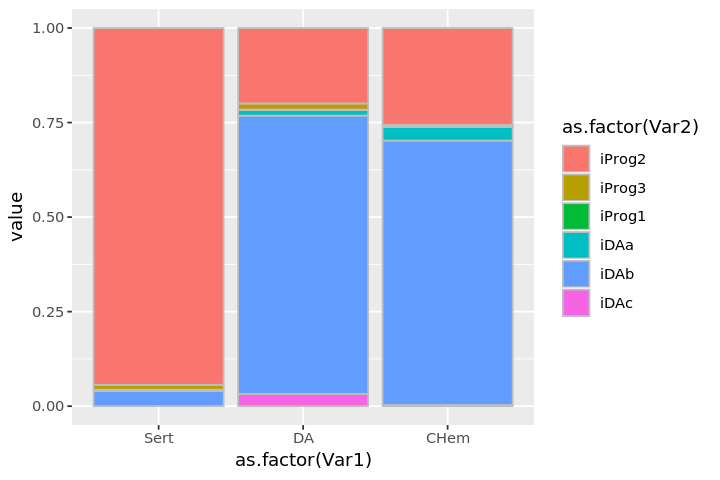

In [161]:
df = as.data.frame(mat_melt)
ggplot(df, aes(x = as.factor(Var1), y = value, fill = as.factor(Var2))) + geom_bar(stat="identity", col = "grey")

In [162]:
sel_cells = colnames(neuroseq[,neuroseq$celltype == 'DA'])
# sel_cells = colnames(neuroseq[,neuroseq$celltype == 'DA' & neuroseq$time_point == 'D30' & 
#                              neuroseq$treatment == 'NONE'])

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

In [163]:
closest_atlas_cell_ind = BiocNeighbors::queryKNN(
    joint_mnn_pca[colnames(LM),],
    joint_mnn_pca[sel_cells,],
  k = 1, get.index = TRUE, get.distance = FALSE)

In [164]:
mapped_cells = colnames(LM)[closest_atlas_cell_ind$index]

In [165]:
df = as.data.frame(colData(LM))

In [166]:
df_mapped = df[mapped_cells,]
head(df_mapped,2)
unique(df_mapped$Cell_type)
nrow(df_mapped)
nrow(df_mapped[df_mapped$Timepoint == "day_42",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$Timepoint == "day_63",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$Cell_type == "iDAa",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$Cell_type == "iDAb",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$Cell_type == "iDAc",])/nrow(df_mapped)

,Cell_ID,Cell_type,Timepoint
1772116-060_A05,1772116-060_A05,iDAb,day_42
1772116-060_A05.1,1772116-060_A05,iDAb,day_42


[1] "iDAb"   "iProg2" "iDAa"   "iProg1" "iDAc"   "iProg3"

[1] 29801

[1] 0.9697997

[1] 0.03020033

[1] 0.01463038

[1] 0.7356129

[1] 0.03271702

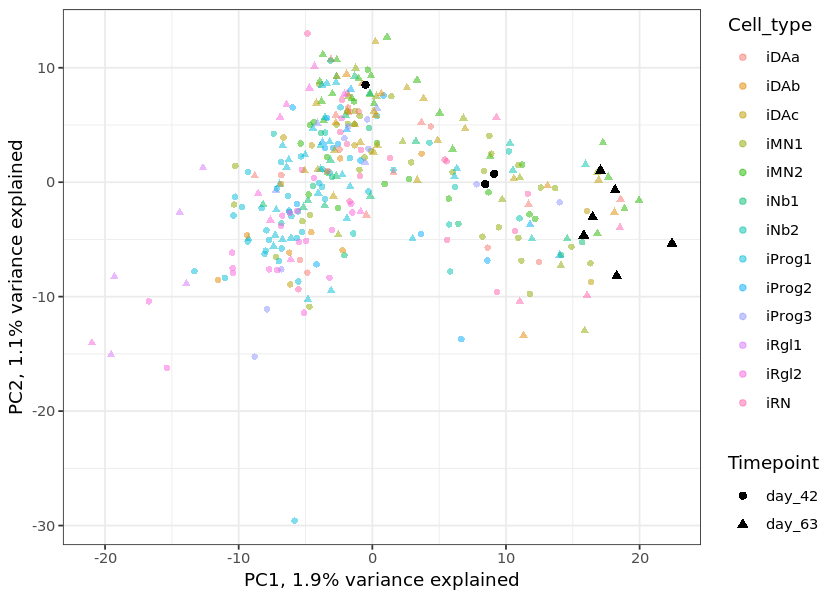

In [73]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(pca_df, aes(x = PC1, y = PC2, colour = Cell_type, shape = Timepoint)) + 
        geom_point(alpha = 0.5, size = 1.5) + 
#         scale_color_canva(palette = "Pool party") +
#         geom_point(aes(x = PC1, y = PC2), data = pca_df[grep("DA",pca_df$Cell_type),], col = "gray30", alpha = 0.5, size = 1.8) +
        geom_point(aes(x = PC1, y = PC2), data = pca_df[mapped_cells,], col = "black", alpha = 1, size = 2) +
        theme_bw() + #theme(legend.position = "none", panel.border = element_blank()) + 
        xlab(paste0("PC1, ",perc_var[1],"% variance explained")) +
        ylab(paste0("PC2, ",perc_var[2],"% variance explained"))

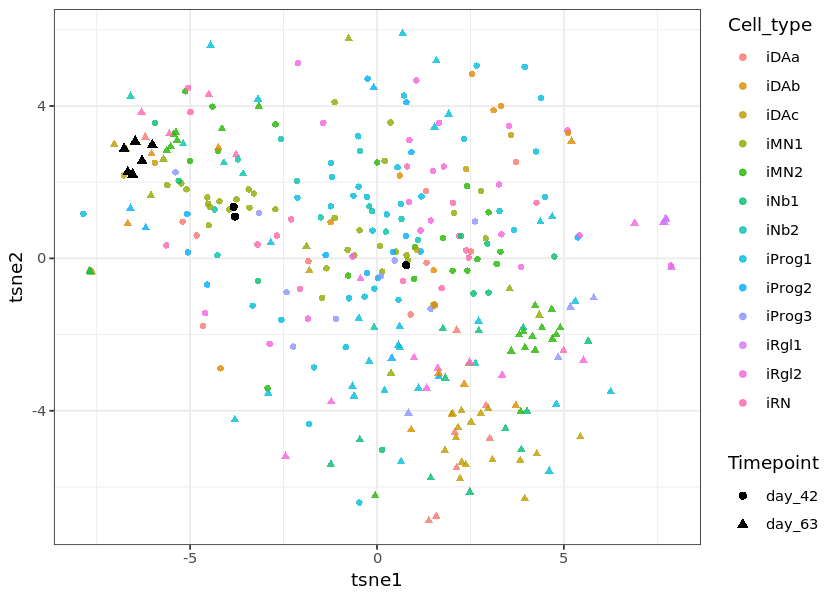

In [76]:
ggplot(tsne_df, aes(x = tsne1, y = tsne2, colour = Cell_type, shape = Timepoint)) + 
        geom_point(alpha = 0.8, size = 1.5) + 
#         scale_color_canva(palette = "Pool party") +
#         geom_point(aes(x = tsne1, y = tsne2), data = tsne_df[grep("DA",tsne_df$Cell_type),], col = "gray30", alpha = 0.5, size = 1.8) +
        geom_point(aes(x = tsne1, y = tsne2), data = tsne_df[mapped_cells,], col = "black", alpha = 1, size = 2) +
        theme_bw() 

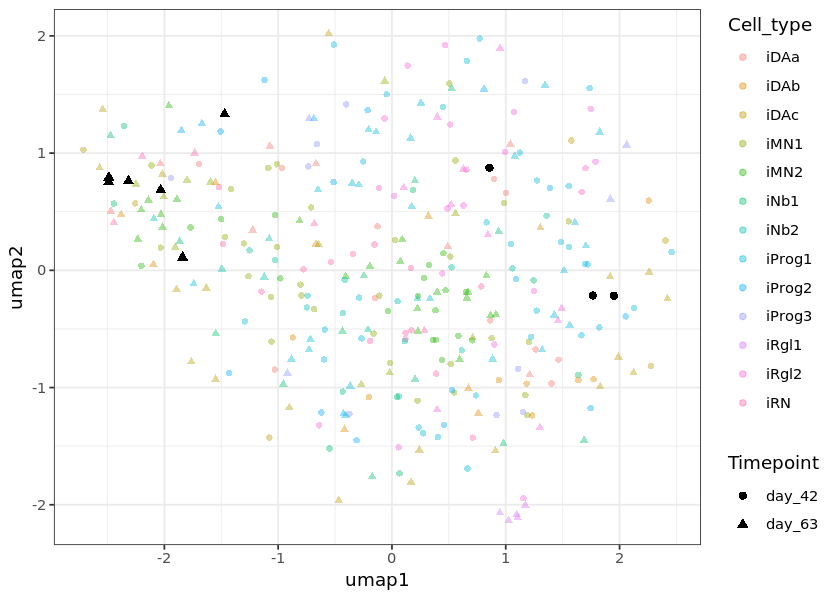

In [75]:
ggplot(umap_df, aes(x = umap1, y = umap2, colour = Cell_type, shape = Timepoint)) + 
        geom_point(alpha = 0.4, size = 1.5) + 
#         scale_color_canva(palette = "Pool party") +
#         geom_point(aes(x = umap1, y = umap2), data = umap_df[grep("DA",umap_df$Cell_type),], col = "gray30", alpha = 1, size = 1.8) +
        geom_point(aes(x = umap1, y = umap2), data = umap_df[mapped_cells,], col = "black", alpha = 1, size = 2) +
        theme_bw() 
# + #theme(legend.position = "none", panel.border = element_blank()) + 